## Zentraler Grenzwertsatz

Der zentrale Grenzwertsatz (ZGWS) ist ein fundamentales Konzept der Wahrscheinlichkeitstheorie und Statistik. Er beschreibt das Verhalten der Verteilung von Stichprobenmittelwerten (oder Summen) großer Stichproben, die aus einer beliebigen Grundgesamtheit gezogen werden.

Er besagt, dass die Verteilung der Mittelwerte (oder Summen) von großen Stichproben aus einer beliebigen Grundgesamtheit, unabhängig von der Form der ursprünglichen Verteilung, immer näher an eine Normalverteilung heranrückt, je größer die Stichprobe wird. Dies gilt, selbst wenn die zugrunde liegende Grundgesamtheit nicht normalverteilt ist.

**Die wichtigsten Aspekte des zentralen Grenzwertsatzes:**

-   **Stichprobenmittelwerte:**  Der ZGWS bezieht sich auf die Verteilung der  _Mittelwerte_  von Stichproben, nicht auf die Verteilung der einzelnen Werte in der Grundgesamtheit.Der ZGWS macht  _keine_  Annahmen über die Form der ursprünglichen Verteilung der Grundgesamtheit. Sie kann beliebig sein: symmetrisch, schief, multimodal usw.
-   **Stichprobenumfang (n):**  Je größer der Stichprobenumfang (n), desto besser ist die Annäherung der Verteilung der Stichprobenmittelwerte an die Normalverteilung.
-   **Unabhängigkeit:**  Die einzelnen Beobachtungen in der Stichprobe müssen voneinander unabhängig sein. Das bedeutet, dass das Ergebnis einer Beobachtung keinen Einfluss auf die Ergebnisse anderer Beobachtungen haben darf.
-   **Endliche Varianz:**  Die ursprüngliche Verteilung der Grundgesamtheit muss eine endliche Varianz besitzen. Das bedeutet, dass die Streuung der Werte nicht unendlich groß sein darf. In den meisten praktischen Anwendungen ist diese Bedingung erfüllt.

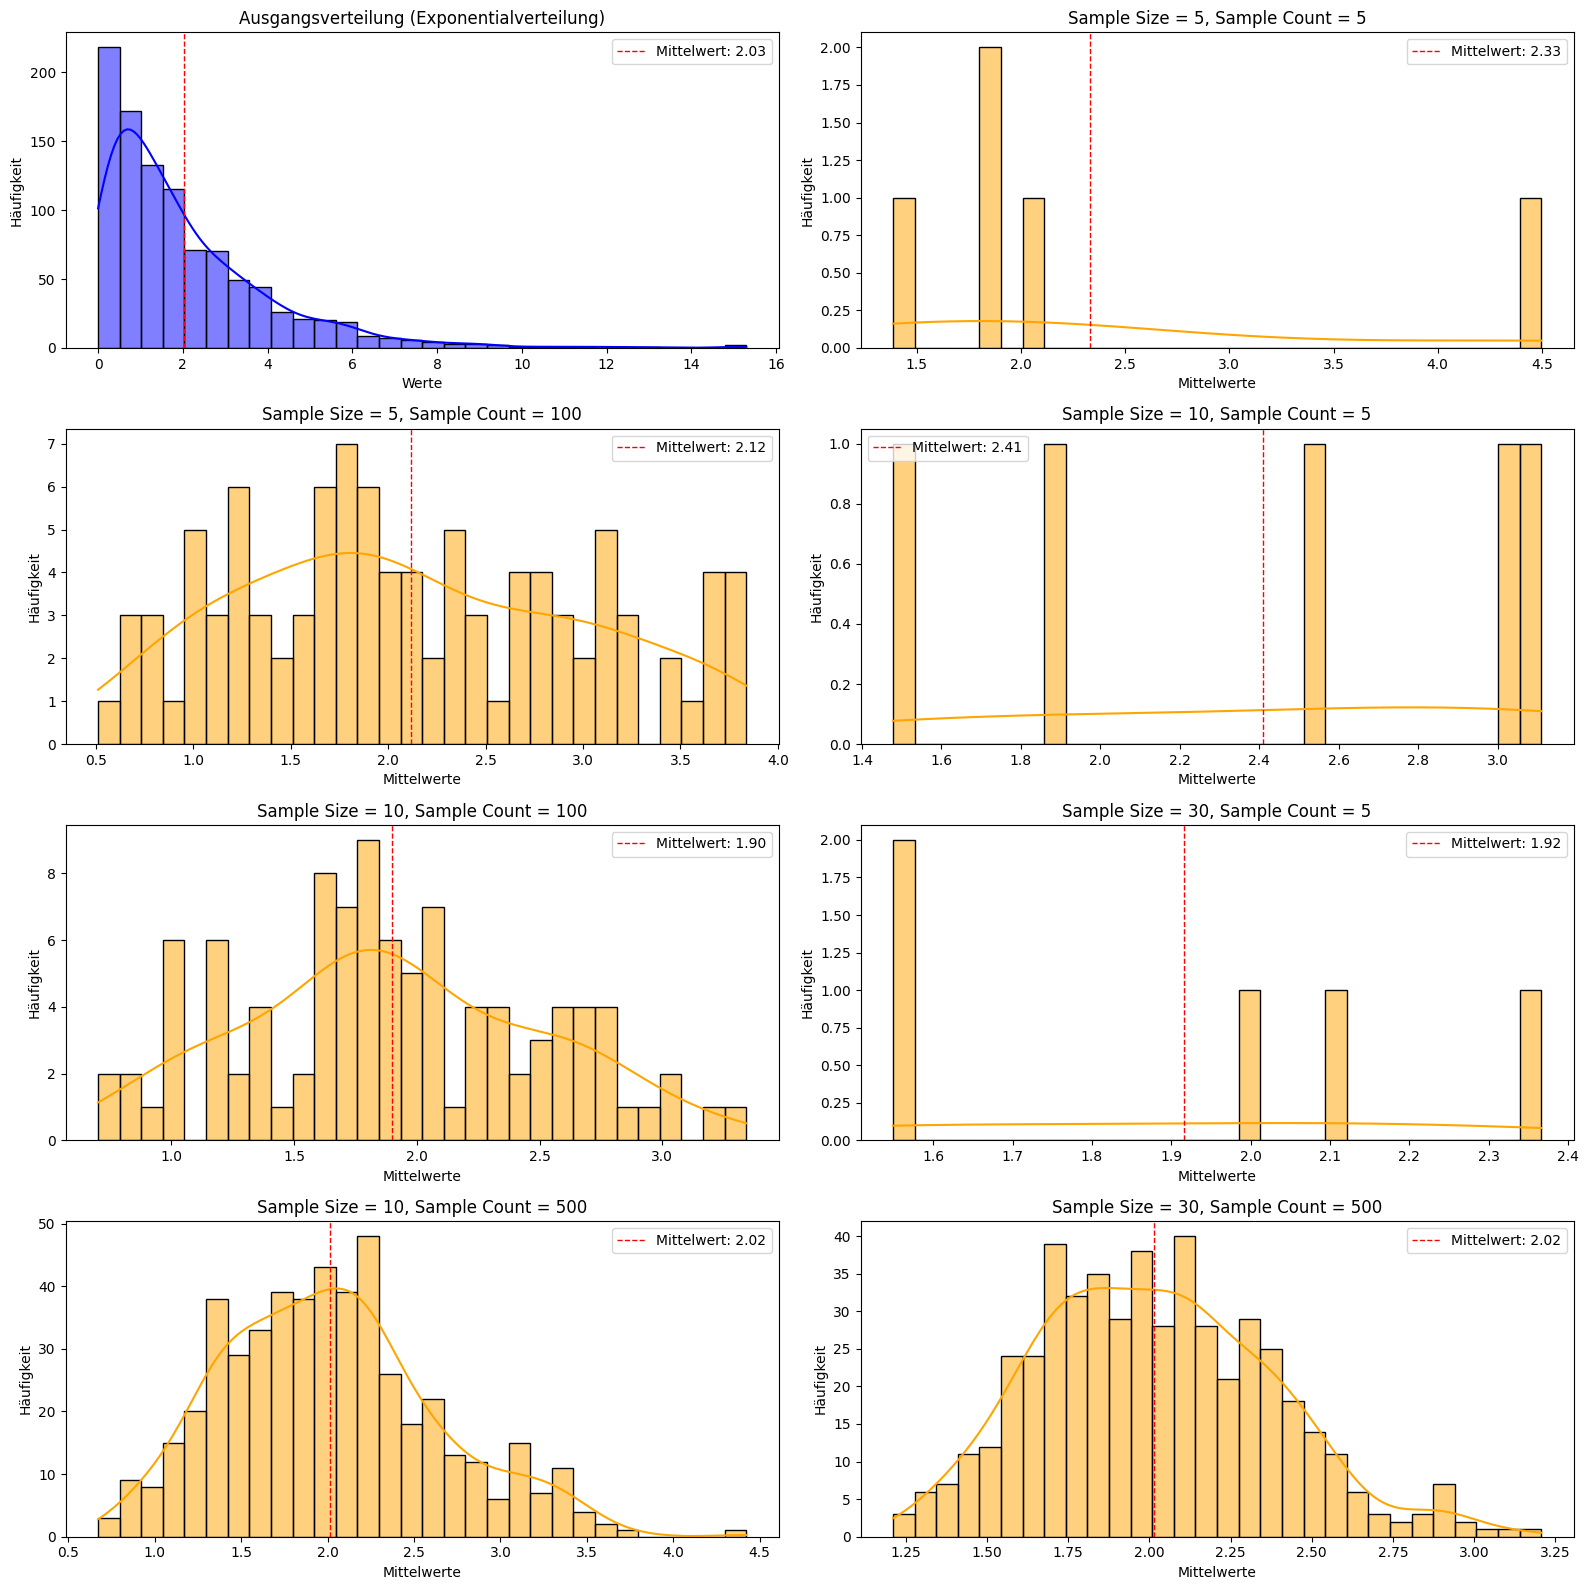

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Zufallszahlengenerator für Reproduzierbarkeit
np.random.seed(32)

# Erstelle eine rechtsschiefe Verteilung (z. B. Exponentialverteilung)
n = 1000  # Anzahl der Werte in der schiefen Verteilung
skewed_data = np.random.exponential(scale=2, size=n)

# Funktion zum Ziehen von Stichproben und Berechnung der Mittelwerte
def sample_means(data, sample_size, num_samples):
    means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(num_samples)]
    return means

# Werte zum Testen
sample_sizes = [5, 5, 10, 10, 30, 10, 30]
sample_counts = [5, 100, 5, 100, 5, 500, 500]

# Plot der schiefen Ausgangsverteilung
rows = (len(sample_sizes) + 1) // 2
plt.figure(figsize=(16, rows * 4))
plt.subplot(rows, 2, 1)
sns.histplot(skewed_data, bins=30, kde=True, color='blue')
plt.title("Ausgangsverteilung (Exponentialverteilung)")
plt.xlabel("Werte")
plt.ylabel("Häufigkeit")
plt.axvline(np.mean(skewed_data), color='red', linestyle='dashed', linewidth=1, label=f'Mittelwert: {np.mean(skewed_data):.2f}')
plt.legend()

# Plotten aller Versuche
for i, (sample_size, sample_count) in enumerate(zip(sample_sizes, sample_counts), start=2):
    means = sample_means(skewed_data, sample_size, sample_count)
    plt.subplot(rows, 2, i)
    sns.histplot(means, bins=30, kde=True, color='orange')
    plt.title(f"Sample Size = {sample_size}, Sample Count = {sample_count}")
    plt.xlabel("Mittelwerte")
    plt.ylabel("Häufigkeit")
    plt.axvline(np.mean(means), color='red', linestyle='dashed', linewidth=1, label=f'Mittelwert: {np.mean(means):.2f}')
    plt.legend()

plt.tight_layout()
plt.show()
